# <center> **Análisis de Clustering**

## <center> **Delitos cometidos en México (2015-2021)**

In [4]:
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
# extrae archivos del .zip
def open_zipfile(file_names):
  for file in file_names: 
    with ZipFile(file, 'r') as zip:
        # imprime el contenido del archivo .zip
        zip.printdir()
        # extrae los archivos
        print('Extracting all the files now...')
        zip.extractall()
        print('Done!')

In [6]:
# función para concatenar archivos
def ConcatFiles(names):
  # lista de archivos
  files = []
  for name in names:
    files.append(pd.read_csv(name + '.csv', encoding= 'unicode_escape'))
  # unión de archivos
  concat = pd.concat(files,axis=0)
  return concat

# **Lectura de datos**

In [7]:
file_names = ["AGEEML_2020515349313.zip", "Municipal-Delitos-2015-2021_dic2021.zip"]
# abre .zip
open_zipfile(file_names)
# unión de archivos
names = ['2015', '2016', '2017', '2018', '2019', '2020', '2021']
delitos =  ConcatFiles(names)
# promedio de latitudes y longitudes por mes
ag = pd.read_csv('AGEEML_2020515349313.csv',  encoding= 'unicode_escape')
ag02 = ag.groupby(['Nom_Ent', 'Nom_Mun'])['Lat_Decimal', 'Lon_Decimal'].mean().reset_index()
ag02.columns = ['Entidad', 'Municipio', 'Latitud', 'Longitud']
# join 
delitos_02 = delitos.melt(id_vars=delitos.columns[:9],
                          var_name="Mes", value_name="Cantidad").\
             groupby(['Año','Entidad', 'Municipio', 'Modalidad'])['Cantidad'].sum().\
             reset_index().\
             pivot(index=['Año',	'Entidad', 'Municipio'], columns='Modalidad', values='Cantidad').\
             reset_index()

df_delitos = pd.merge(delitos_02, ag02, how='inner', on=["Entidad", "Municipio"])
df_delitos.head()

File Name                                             Modified             Size
AGEEML_2020515349313.csv                       2020-05-15 03:53:12     44175530
Extracting all the files now...
Done!
File Name                                             Modified             Size
2015.csv                                       2022-07-02 19:53:24     27859157
2016.csv                                       2022-07-02 19:54:10     27859769
2017.csv                                       2022-07-02 19:52:40     35735464
2018.csv                                       2022-07-02 19:54:50     35808091
2019.csv                                       2022-07-02 19:55:24     35810308
2020.csv                                       2022-07-02 19:56:02     35806227
2021.csv                                       2022-07-02 19:56:34     35908343
Extracting all the files now...
Done!


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


,Año,Entidad,Municipio,Aborto,Abuso de confianza,Abuso sexual,Acoso sexual,Allanamiento de morada,Amenazas,Con arma blanca,...,Secuestro para causar daño,Sin violencia,Trata de personas,Tráfico de menores,Violación equiparada,Violación simple,Violencia de género en todas sus modalidades distinta a la violencia familiar,Violencia familiar,Latitud,Longitud
0,2015,Aguascalientes,Aguascalientes,1,339,15,0,129,991,122,...,0,6385,2,0,24,61,2,410,21.831189,-102.282474
1,2016,Aguascalientes,Aguascalientes,5,342,1,0,126,895,137,...,0,6101,2,1,35,78,3,564,21.831189,-102.282474
2,2017,Aguascalientes,Aguascalientes,3,573,0,0,274,1850,174,...,0,8059,0,2,40,121,4,845,21.831189,-102.282474
3,2018,Aguascalientes,Aguascalientes,3,613,0,0,313,2423,120,...,1,8079,2,1,32,115,5,1177,21.831189,-102.282474
4,2019,Aguascalientes,Aguascalientes,5,550,0,0,336,2707,121,...,2,6501,3,0,64,161,9,1563,21.831189,-102.282474


In [8]:
pd.unique(delitos['Tipo de delito'])

array(['Homicidio', 'Lesiones', 'Feminicidio', 'Aborto',
       'Otros delitos que atentan contra la vida y la integridad corporal',
       'Secuestro', 'Tráfico de menores', 'Rapto',
       'Otros delitos que atentan contra la libertad personal',
       'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual',
       'Violación simple', 'Violación equiparada', 'Incesto',
       'Otros delitos que atentan contra la libertad y la seguridad sexual',
       'Robo', 'Fraude', 'Abuso de confianza', 'Extorsión',
       'Daño a la propiedad', 'Despojo',
       'Otros delitos contra el patrimonio', 'Violencia familiar',
       'Violencia de género en todas sus modalidades distinta a la violencia familiar',
       'Incumplimiento de obligaciones de asistencia familiar',
       'Otros delitos contra la familia', 'Corrupción de menores',
       'Trata de personas', 'Otros delitos contra la sociedad',
       'Narcomenudeo', 'Amenazas', 'Allanamiento de morada',
       'Evasión de presos', 'Falsedad'

# **Unión de archivos**

In [6]:
import folium
from folium.plugins import MarkerCluster

In [7]:
df_map = df_delitos.copy()

In [ ]:
# Map 
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
# for looop
for i in range(len(df_map)):
        lat = df_map.iloc[i]['Latitud']
        long = df_map.iloc[i]['Longitud']
        radius=5
        popup_text = """Estado : {}<br>
                    %Municipio : {}<br>"""
        popup_text = popup_text.format(df_map.iloc[i]['Entidad'],
                                       df_map.iloc[i]['Municipio'])
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

# Clustering

Primero seleccionamos variables numéricas


In [9]:
df_delitos = df_delitos[['Año', 'Entidad', 'Municipio', 'Abuso sexual', 'Con arma blanca', 'Con arma de fuego', 
       'Con violencia', 'Corrupción de menores', 'Delitos cometidos por servidores públicos',
       'Extorsión', 'Narcomenudeo',  'Latitud', 'Longitud']]

In [10]:
df_delitos.head()

,Año,Entidad,Municipio,Abuso sexual,Con arma blanca,Con arma de fuego,Con violencia,Corrupción de menores,Delitos cometidos por servidores públicos,Extorsión,Narcomenudeo,Latitud,Longitud
0,2015,Aguascalientes,Aguascalientes,15,122,34,698,44,5,28,557,21.831189,-102.282474
1,2016,Aguascalientes,Aguascalientes,1,137,42,732,45,24,62,644,21.831189,-102.282474
2,2017,Aguascalientes,Aguascalientes,0,174,89,906,46,40,83,607,21.831189,-102.282474
3,2018,Aguascalientes,Aguascalientes,0,120,90,967,46,41,101,1236,21.831189,-102.282474
4,2019,Aguascalientes,Aguascalientes,0,121,107,806,59,160,82,1293,21.831189,-102.282474


In [11]:
delitos_2020 = df_delitos[df_delitos['Año']==2020].reset_index().drop('index', axis=1)
delitos_2020.head()

,Año,Entidad,Municipio,Abuso sexual,Con arma blanca,Con arma de fuego,Con violencia,Corrupción de menores,Delitos cometidos por servidores públicos,Extorsión,Narcomenudeo,Latitud,Longitud
0,2020,Aguascalientes,Aguascalientes,0,101,76,683,43,370,73,1372,21.831189,-102.282474
1,2020,Aguascalientes,Asientos,0,6,4,6,0,5,1,46,22.140375,-102.041058
2,2020,Aguascalientes,Calvillo,0,2,4,2,3,10,2,54,21.880951,-102.715365
3,2020,Aguascalientes,Cosío,0,4,1,3,0,0,3,10,22.358699,-102.280826
4,2020,Aguascalientes,El Llano,0,4,2,3,2,12,1,22,21.881242,-102.077864


In [12]:
X = delitos_2020.loc[:,delitos_2020.columns[3:-2]]
X.head()

,Abuso sexual,Con arma blanca,Con arma de fuego,Con violencia,Corrupción de menores,Delitos cometidos por servidores públicos,Extorsión,Narcomenudeo
0,0,101,76,683,43,370,73,1372
1,0,6,4,6,0,5,1,46
2,0,2,4,2,3,10,2,54
3,0,4,1,3,0,0,3,10
4,0,4,2,3,2,12,1,22


# **K-Means**

In [13]:
from sklearn.cluster import KMeans

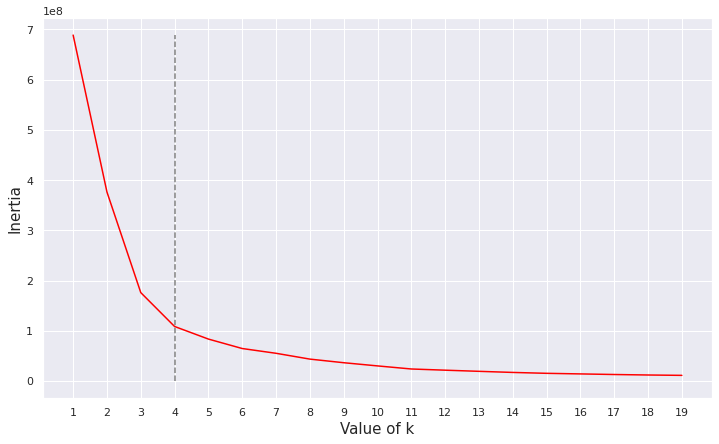

In [14]:
max_num_clusters = 20

inertias = []
k_values = list(range(1, max_num_clusters)) 
for k in k_values:
    modelo = KMeans(n_clusters=k)
    modelo.fit(X)
    inertias.append(modelo.inertia_)

plt.figure(figsize=(12,7))
plt.plot(k_values,inertias,color='red')
plt.plot([4,4],[0,max(inertias)],linestyle='dashed',color='gray')
plt.ylabel("Inertia", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.xticks(k_values)
plt.show()

**Coeficiente de silueta**

In [15]:
from sklearn.metrics import silhouette_score

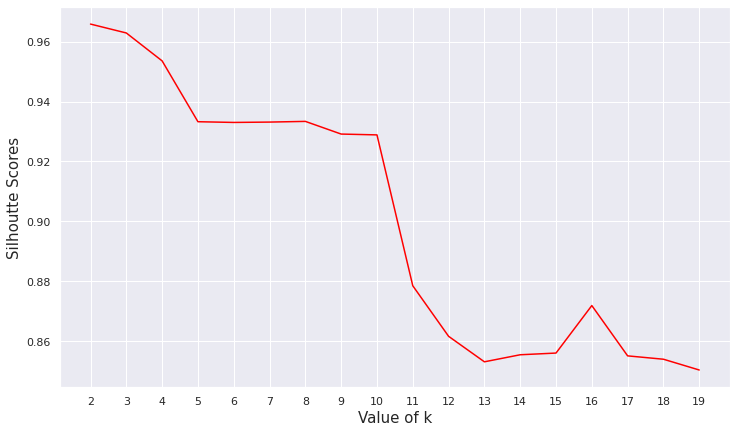

In [16]:
max_num_clusters = 20

siluetas = []
k_values = list(range(2,max_num_clusters)) 
for k in k_values:
    modelo = KMeans(n_clusters=k)
    modelo.fit(X)
    labels = modelo.labels_
    siluetas.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure(figsize=(12,7))
plt.plot(k_values,siluetas,color='red')
#plt.plot([11,11],[-1,1],linestyle='dashed',color='gray')
plt.xticks(k_values)
plt.ylabel("Silhoutte Scores", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

Vamos a probar con 4 clusters.

In [17]:
modelo = KMeans(n_clusters=4)
modelo.fit(X)
y_clusters = modelo.predict(X)
print(y_clusters)

[0 0 0 ... 0 0 0]


In [18]:
delitos_2020['cluster'] = y_clusters
delitos_2020.head()

,Año,Entidad,Municipio,Abuso sexual,Con arma blanca,Con arma de fuego,Con violencia,Corrupción de menores,Delitos cometidos por servidores públicos,Extorsión,Narcomenudeo,Latitud,Longitud,cluster
0,2020,Aguascalientes,Aguascalientes,0,101,76,683,43,370,73,1372,21.831189,-102.282474,0
1,2020,Aguascalientes,Asientos,0,6,4,6,0,5,1,46,22.140375,-102.041058,0
2,2020,Aguascalientes,Calvillo,0,2,4,2,3,10,2,54,21.880951,-102.715365,0
3,2020,Aguascalientes,Cosío,0,4,1,3,0,0,3,10,22.358699,-102.280826,0
4,2020,Aguascalientes,El Llano,0,4,2,3,2,12,1,22,21.881242,-102.077864,0


In [19]:
delitos_2020[delitos_2020['cluster']==3]

,Año,Entidad,Municipio,Abuso sexual,Con arma blanca,Con arma de fuego,Con violencia,Corrupción de menores,Delitos cometidos por servidores públicos,Extorsión,Narcomenudeo,Latitud,Longitud,cluster
224,2020,Ciudad de México,Iztapalapa,520,199,414,4742,31,1462,64,1276,19.359004,-99.092623,3
569,2020,Jalisco,Guadalajara,386,157,409,6397,24,93,166,259,20.702727,-103.301311,3
835,2020,México,Ecatepec de Morelos,393,209,443,9021,27,416,331,497,19.594831,-99.055433,3
861,2020,México,Naucalpan de Juárez,180,98,237,5365,5,289,163,1215,19.464215,-99.326946,3


De los grupos formados podemos extraer algunas conclusiones:
- **Cluster 0**: Formado por los municipios con menores cifras de delitos de todo tipo.
- **Cluster 2**: Formado por aquellos municipios con altas cifras de delitos como: narcomenudeo, robo con violencia, y homicidios con arma de fuego.
- **Cluster 3**: Se caracteriza principalmente por presentar altas cifras de robo con violencia.

Ahora vamos a aplicar Componentes Principales, quedarnos con dos componentes y graficar ambas componentes para observar como se miran los grupos.

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=2)
Y = pca.fit_transform(X)
CPS = pd.DataFrame(Y)
CPS

,0,1
0,1286.743435,757.846957
1,-45.083197,47.438877
2,-43.588248,56.265717
3,-68.262374,19.314730
4,-60.549697,29.264543
...,...,...
2452,-76.583558,12.797291
2453,-75.590608,12.277471
2454,-76.502921,12.793757
2455,-74.571238,11.760053


Al dataframe de las dos componenetes le pegamos como índice el municipio y como tercer columna las etiquetas de los clusters asignados a cada observación.

In [21]:
#CPS.set_index(delitos_2020['Entidad'])
CPS['Municipio'] = delitos_2020['Municipio']
CPS['cluster'] = y_clusters
CPS = CPS.set_index('Municipio')
CPS

,0,1,cluster
Municipio,,,
Aguascalientes,1286.743435,757.846957,0
Asientos,-45.083197,47.438877,0
Calvillo,-43.588248,56.265717,0
Cosío,-68.262374,19.314730,0
El Llano,-60.549697,29.264543,0
...,...,...,...
Capitán Luis Ángel Vidal,-76.583558,12.797291,0
El Parral,-75.590608,12.277471,0
Emiliano Zapata,-76.502921,12.793757,0


Graficamos las dos componentes con distinto color dependiendo del cluster asignado. 

[0 1 2 3]


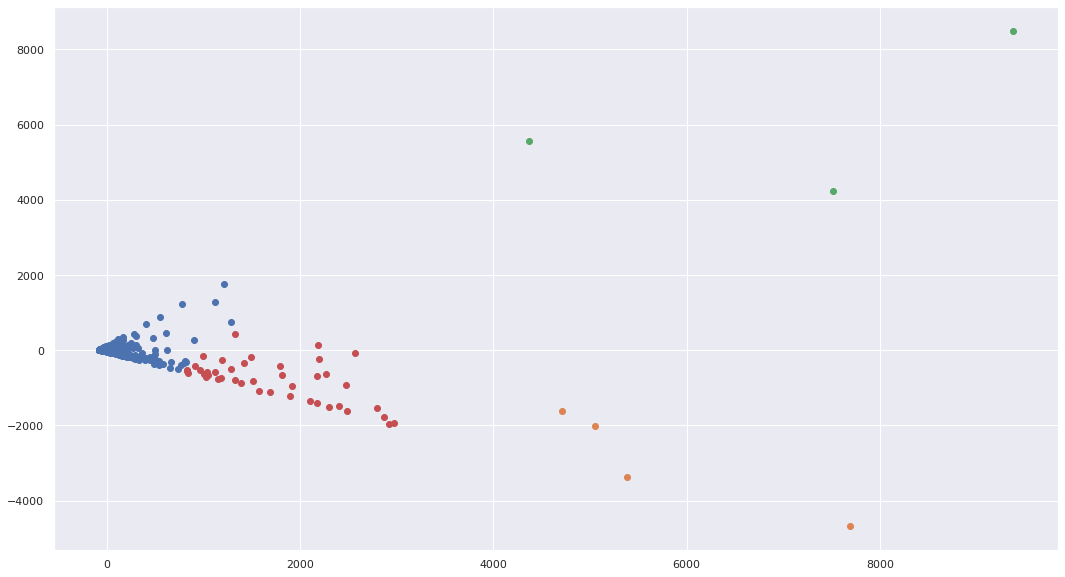

In [22]:
clusters = np.unique(y_clusters)
plt.figure(figsize=(18,10))
print(clusters)
for cluster in clusters:
    fila = np.where(y_clusters == cluster)[0]
    plt.scatter(CPS.iloc[fila, 0], CPS.iloc[fila, 1])
#for i in range(len(CPS['cluster'])):
#    plt.text(CPS.iloc[i, 0], CPS.iloc[i, 1], CPS.index[i])
plt.show()

Finalmente agregamos las equiquetas a cada punto. 

[0 1 2 3]


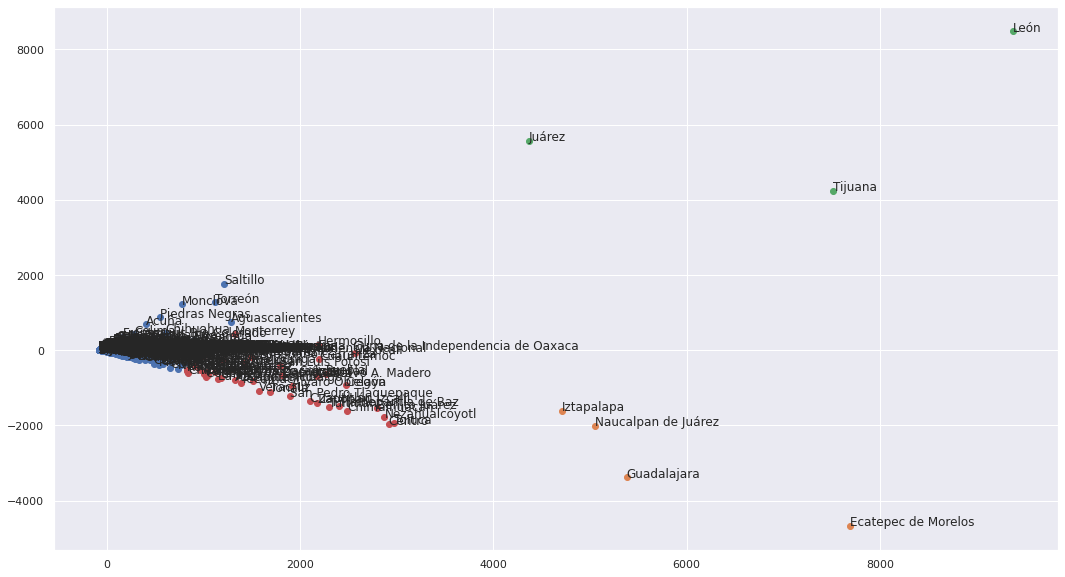

In [23]:
clusters = np.unique(y_clusters)
plt.figure(figsize=(18,10))
print(clusters)
for cluster in clusters:
    fila = np.where(y_clusters == cluster)[0]
    plt.scatter(CPS.iloc[fila, 0], CPS.iloc[fila, 1])
for i in range(len(CPS['cluster'])):
    plt.text(CPS.iloc[i, 0], CPS.iloc[i, 1], CPS.index[i])
plt.show()

# Aglomerative Clustering

In [24]:
from sklearn.cluster import AgglomerativeClustering

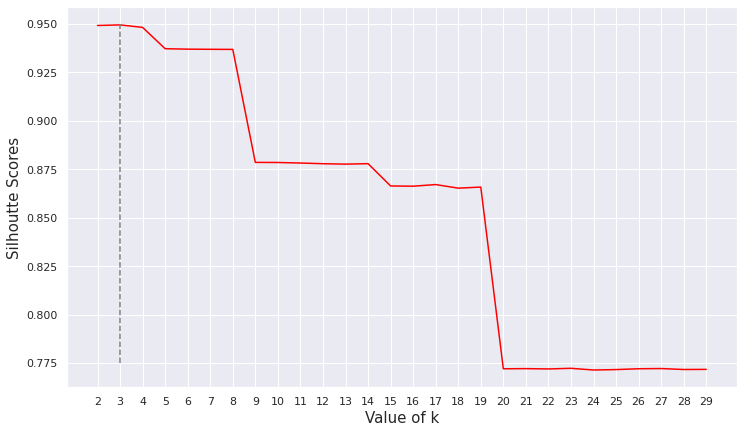

In [25]:
max_num_clusters = 30

siluetas = []
k_values = list(range(2,max_num_clusters)) 
for k in k_values:
    ac = AgglomerativeClustering(n_clusters=k)
    ac.fit(X)
    labels = ac.labels_
    siluetas.append(silhouette_score(X, labels, metric='euclidean'))

plt.figure(figsize=(12,7))
plt.plot(k_values,siluetas,color='red')
plt.plot([3,3],[0.775,0.95],linestyle='dashed',color='gray')
plt.xticks(k_values)
plt.ylabel("Silhoutte Scores", fontsize=15)
plt.xlabel("Value of k", fontsize=15)
plt.show()

In [31]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
import plotly.figure_factory as ff

In [33]:
  
fig = ff.create_dendrogram(X)
fig.update_layout(width=1200, height=800)
fig.show()

In [35]:
model2 = AgglomerativeClustering(n_clusters=3)
model2.fit(X)
y_clusters = model2.labels_
print(y_clusters)

[0 1 1 ... 1 1 1]


In [36]:
delitos_2020 = df_delitos[df_delitos['Año']==2020].reset_index().drop('index', axis=1)
delitos_2020.head()

,Año,Entidad,Municipio,Abuso sexual,Con arma blanca,Con arma de fuego,Con violencia,Corrupción de menores,Delitos cometidos por servidores públicos,Extorsión,Narcomenudeo,Latitud,Longitud
0,2020,Aguascalientes,Aguascalientes,0,101,76,683,43,370,73,1372,21.831189,-102.282474
1,2020,Aguascalientes,Asientos,0,6,4,6,0,5,1,46,22.140375,-102.041058
2,2020,Aguascalientes,Calvillo,0,2,4,2,3,10,2,54,21.880951,-102.715365
3,2020,Aguascalientes,Cosío,0,4,1,3,0,0,3,10,22.358699,-102.280826
4,2020,Aguascalientes,El Llano,0,4,2,3,2,12,1,22,21.881242,-102.077864


In [37]:
delitos_2020['cluster'] = y_clusters
delitos_2020.head()

,Año,Entidad,Municipio,Abuso sexual,Con arma blanca,Con arma de fuego,Con violencia,Corrupción de menores,Delitos cometidos por servidores públicos,Extorsión,Narcomenudeo,Latitud,Longitud,cluster
0,2020,Aguascalientes,Aguascalientes,0,101,76,683,43,370,73,1372,21.831189,-102.282474,0
1,2020,Aguascalientes,Asientos,0,6,4,6,0,5,1,46,22.140375,-102.041058,1
2,2020,Aguascalientes,Calvillo,0,2,4,2,3,10,2,54,21.880951,-102.715365,1
3,2020,Aguascalientes,Cosío,0,4,1,3,0,0,3,10,22.358699,-102.280826,1
4,2020,Aguascalientes,El Llano,0,4,2,3,2,12,1,22,21.881242,-102.077864,1


In [40]:
delitos_2020[delitos_2020['cluster']==2]

,Año,Entidad,Municipio,Abuso sexual,Con arma blanca,Con arma de fuego,Con violencia,Corrupción de menores,Delitos cometidos por servidores públicos,Extorsión,Narcomenudeo,Latitud,Longitud,cluster
15,2020,Baja California,Tijuana,614,305,1446,3789,342,490,47,7648,32.449836,-116.875467,2
186,2020,Chihuahua,Juárez,531,290,1395,379,49,1065,9,6943,31.491614,-106.512822,2
337,2020,Guanajuato,León,371,202,692,3052,58,26,1,12334,21.090155,-101.645337,2


In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)
Y = pca.fit_transform(X)
CPS = pd.DataFrame(Y)
CPS

,0,1
0,1286.743435,757.846957
1,-45.083197,47.438877
2,-43.588248,56.265717
3,-68.262374,19.314730
4,-60.549697,29.264543
...,...,...
2452,-76.583558,12.797291
2453,-75.590608,12.277471
2454,-76.502921,12.793757
2455,-74.571238,11.760053


In [43]:
CPS['Municipio'] = delitos_2020['Municipio']
CPS['cluster'] = y_clusters
CPS = CPS.set_index('Municipio')
CPS

,0,1,cluster
Municipio,,,
Aguascalientes,1286.743435,757.846957,0
Asientos,-45.083197,47.438877,1
Calvillo,-43.588248,56.265717,1
Cosío,-68.262374,19.314730,1
El Llano,-60.549697,29.264543,1
...,...,...,...
Capitán Luis Ángel Vidal,-76.583558,12.797291,1
El Parral,-75.590608,12.277471,1
Emiliano Zapata,-76.502921,12.793757,1


[0 1 2]


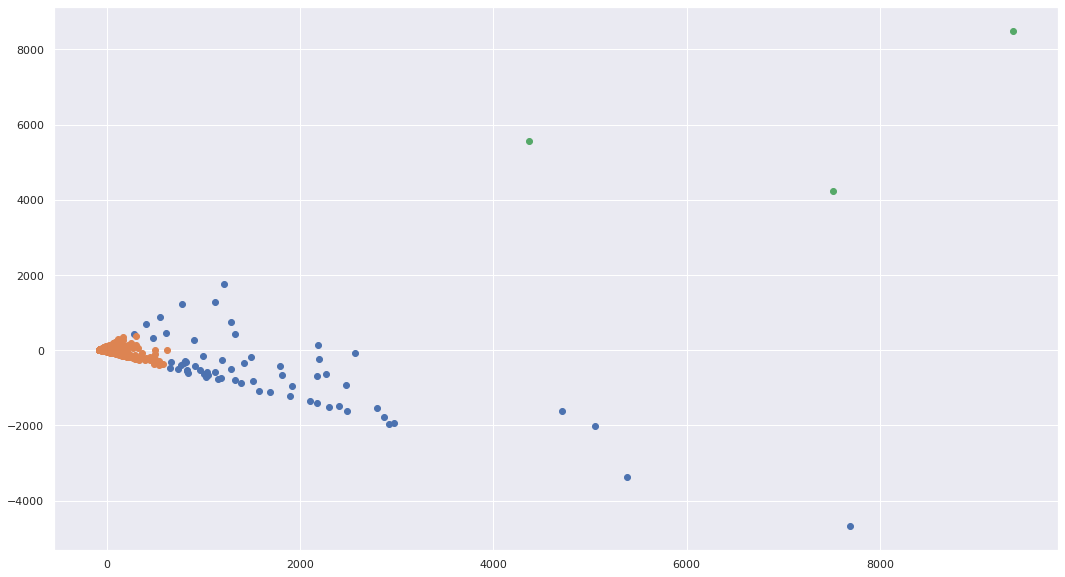

In [44]:
clusters = np.unique(y_clusters)
plt.figure(figsize=(18,10))
print(clusters)
for cluster in clusters:
    fila = np.where(y_clusters == cluster)[0]
    plt.scatter(CPS.iloc[fila, 0], CPS.iloc[fila, 1])
#for i in range(len(CPS['cluster'])):
#    plt.text(CPS.iloc[i, 0], CPS.iloc[i, 1], CPS.index[i])
plt.show()

[0 1 2]


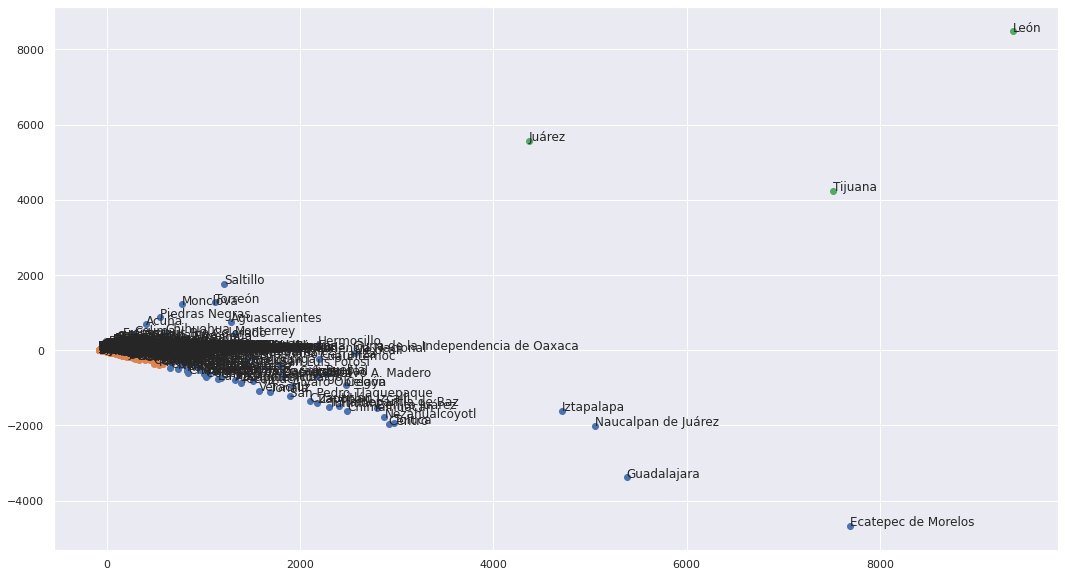

In [45]:
clusters = np.unique(y_clusters)
plt.figure(figsize=(18,10))
print(clusters)
for cluster in clusters:
    fila = np.where(y_clusters == cluster)[0]
    plt.scatter(CPS.iloc[fila, 0], CPS.iloc[fila, 1])
for i in range(len(CPS['cluster'])):
    plt.text(CPS.iloc[i, 0], CPS.iloc[i, 1], CPS.index[i])
plt.show()